In [ ]:
# Dataset source
# https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data

# Dataset Features:

#     Age | Objective Feature | age | int (days)
#     Height | Objective Feature | height | int (cm) |
#     Weight | Objective Feature | weight | float (kg) |
#     Gender | Objective Feature | gender | categorical code | 1: women | 2: men
#     Systolic blood pressure | Examination Feature | ap_hi | int |
#     Diastolic blood pressure | Examination Feature | ap_lo | int |
#     Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
#     Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
#     Smoking | Subjective Feature | smoke | binary |
#     Alcohol intake | Subjective Feature | alco | binary |
#     Physical activity | Subjective Feature | active | binary |
#     Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
from matplotlib import rcParams

## DATA ANALYSIS AND TRANSFORMATION

In [25]:
#Import the Cardiovascular Disease dataset
data = pd.read_csv('./archive/cardio_train.csv', sep=";")


#Quick overview of the data and important stats
print(data.head()) #to visualize the first 5 rows of the dataset
data.info() #to check the data type for each variable; all features are numerical, 11 of integer type and 1 of decimal type
data.describe() #to identify important statistics for each variable (e.g. mean, standard deviation, min, max, etc.); one can spot the outliers in height, weight, ap_hi, api_lo



   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# DATA PREPROCESSING 5 STEPS - 
#   1) Remove Duplicates  - X
#   2) Convert Categorical Data (worded) to Numerical Data  - X
#   3) Convert int to float
#   4) Remove NULL values  - X
#   5) Remove outliers

#Are there null values?What about duplicates?
print(data.isnull().sum()) #check for null values

print(f"Number of duplicate rows: {data.duplicated().sum()}") #display the number of duplicate values
duplicate_count = data.duplicated().sum()
if duplicate_count > 0:
    data = data.drop_duplicates() #remove duplicates if applicable


#data transformation, removing outliers, and interesting findings
data['years'] = (data['age'] / 365).round().astype('int') #in order to have a more appropriate format for age
data['cardio'].value_counts(normalize=True) #to balance the target variable
data['bmi'] = data['weight'] / (data['height']/100)**2 #include the BMI variable
data.drop('id', axis=1, inplace=True) #id column is not vital for modeling
data.drop('age', axis=1, inplace=True) #not needed after calculating the age
data.describe()
data.info()
len(data)


data[data._get_numeric_data().columns] = data[data._get_numeric_data().columns].astype('float') #convert al numeric data to float


data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True) #remove outliers => remove heights that fall below 2.5% or above 97.5% of a given range
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True) #remove outliers => remove weights that fall below 2.5% or above 97.5% of a given range
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True) #remove outliers => remove systolic blood pressure values that fall below 2.5% or above 97.5% of a given range
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True) #remove outliers => remove diastolic blood pressure values that fall below 2.5% or above 97.5% of a given range
len(data)

print("\n")
print(data.groupby('gender')['height'].mean()) #on average, men are taller than women

print("\n")
print(data.groupby('gender')['alco'].sum()) #on average, men drink more than women


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
 11  years        70000 non-null  int32  
 12  bmi          70000 non-null  float64

In [30]:
data

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,50.0,21.967120
1,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,55.0,34.927679
2,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,52.0,23.507805
3,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,48.0,28.710479
4,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,48.0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1.0,172.0,70.0,130.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0,54.0,23.661439
69994,1.0,165.0,80.0,150.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0,58.0,29.384757
69995,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0,53.0,26.927438
69998,1.0,163.0,72.0,135.0,80.0,1.0,2.0,0.0,0.0,0.0,1.0,61.0,27.099251


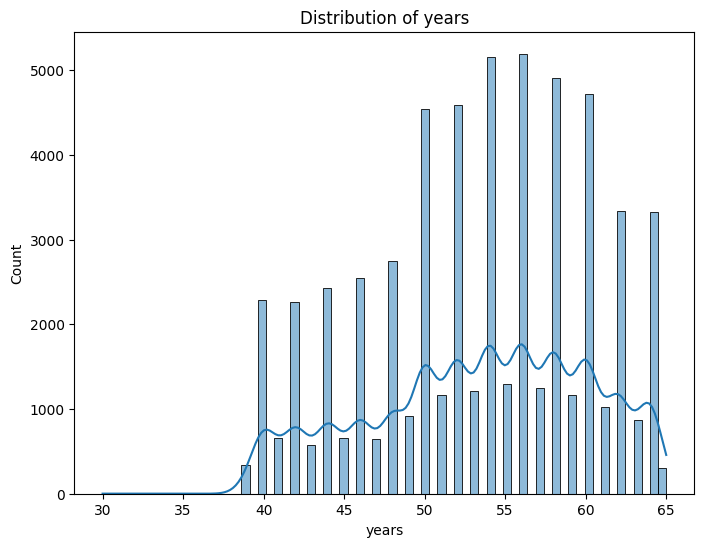

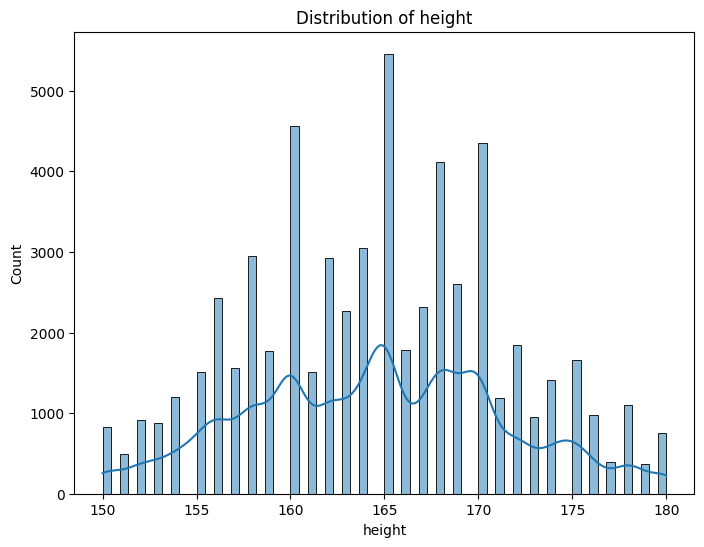

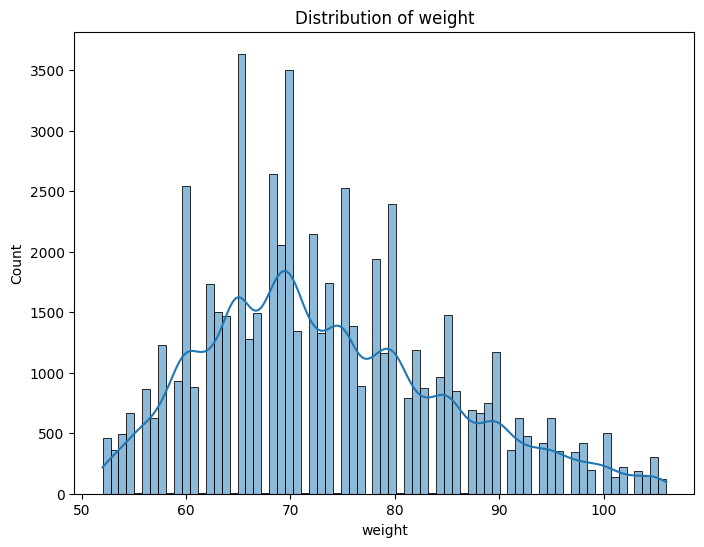

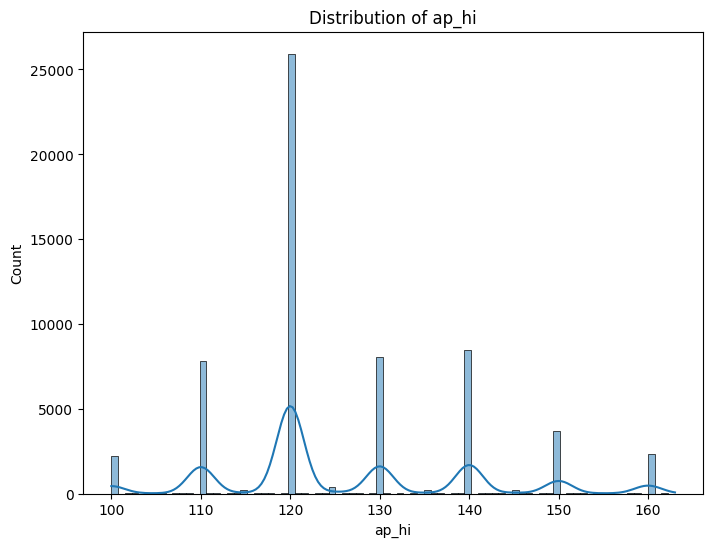

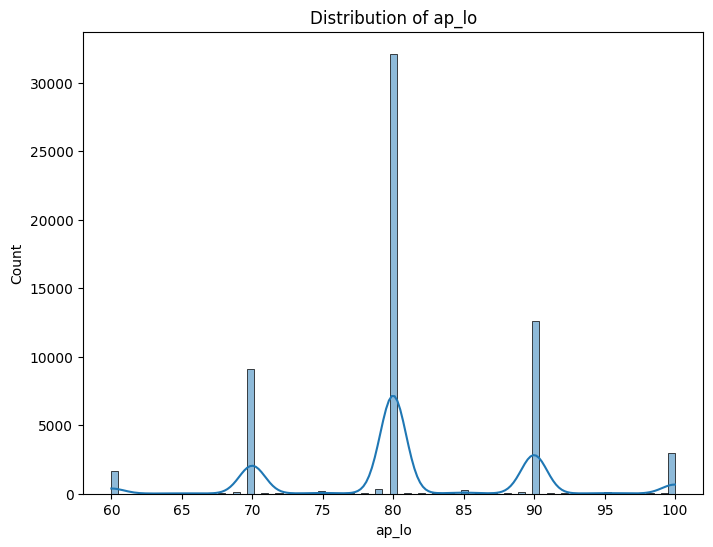

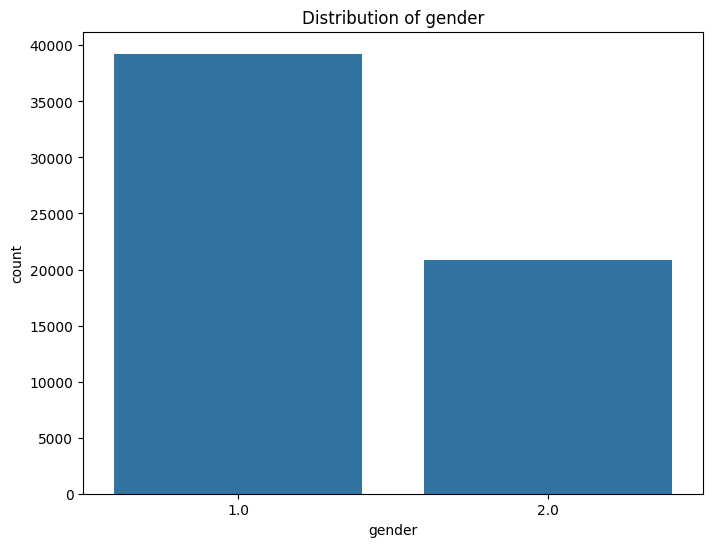

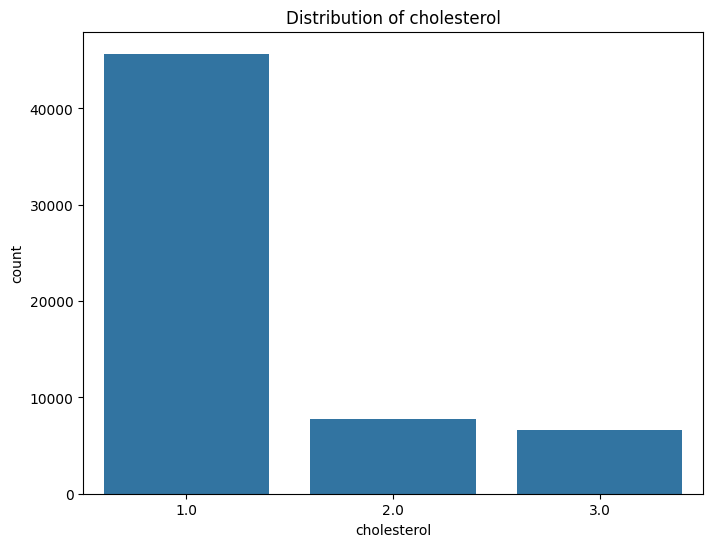

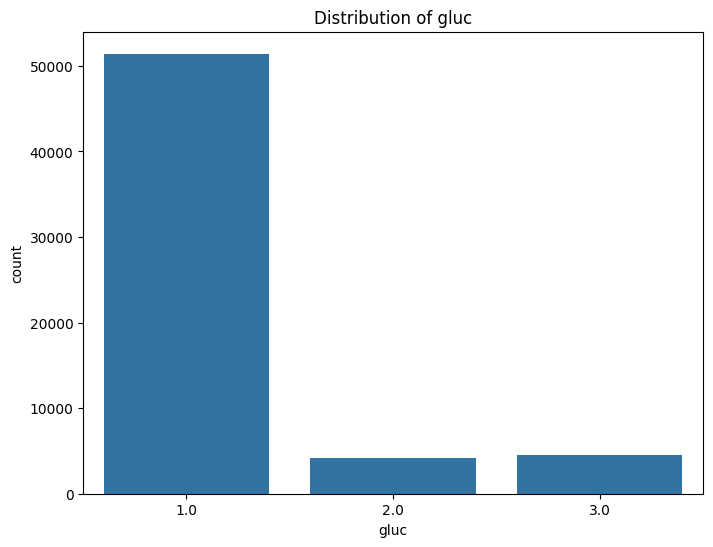

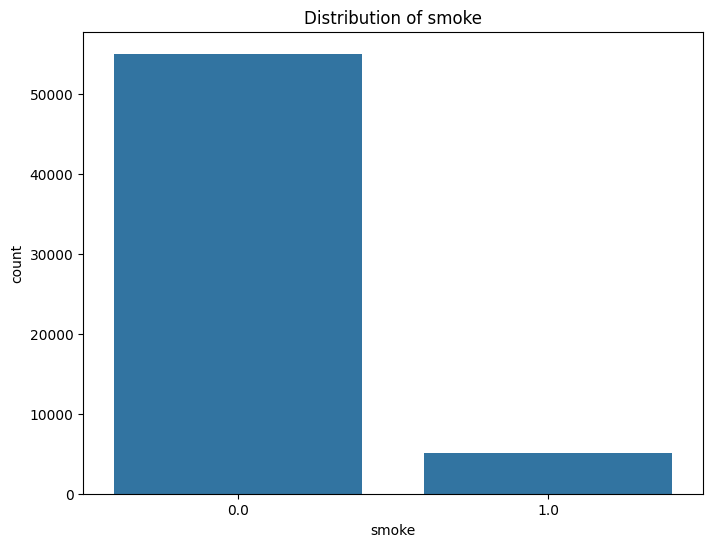

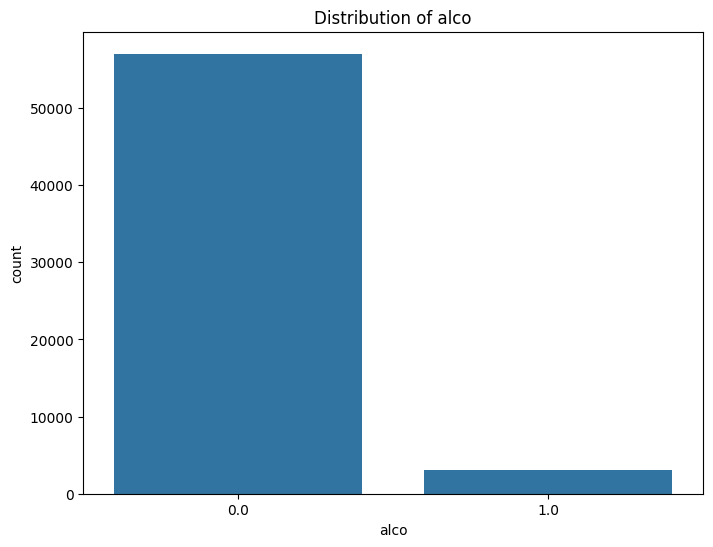

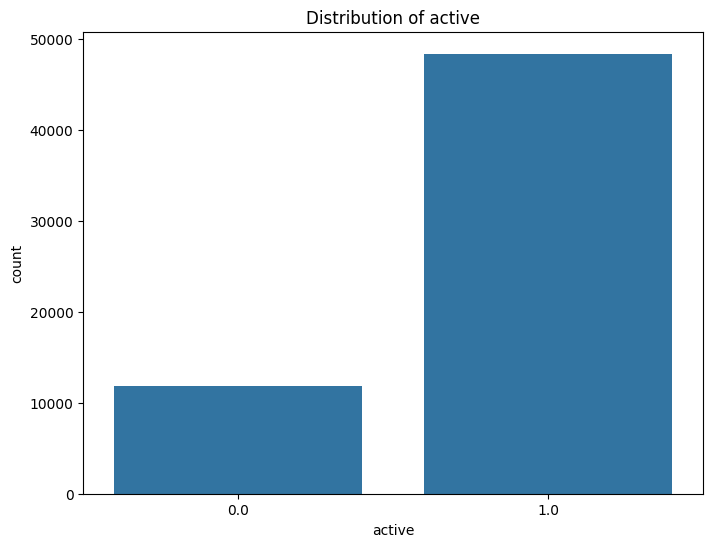

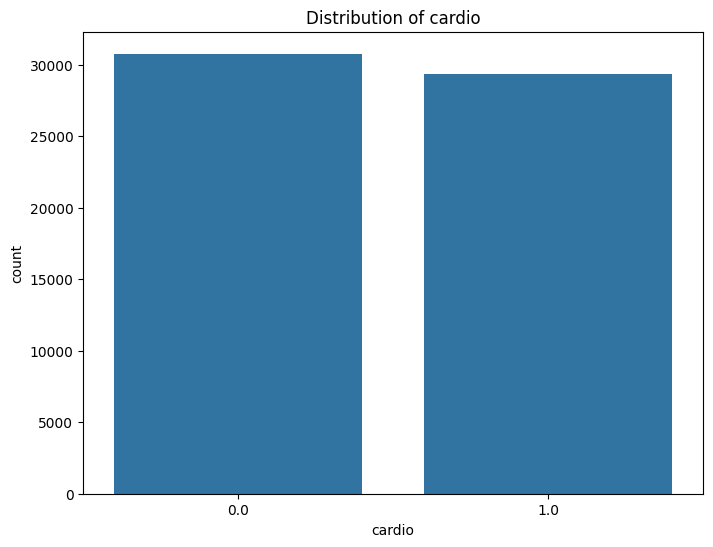

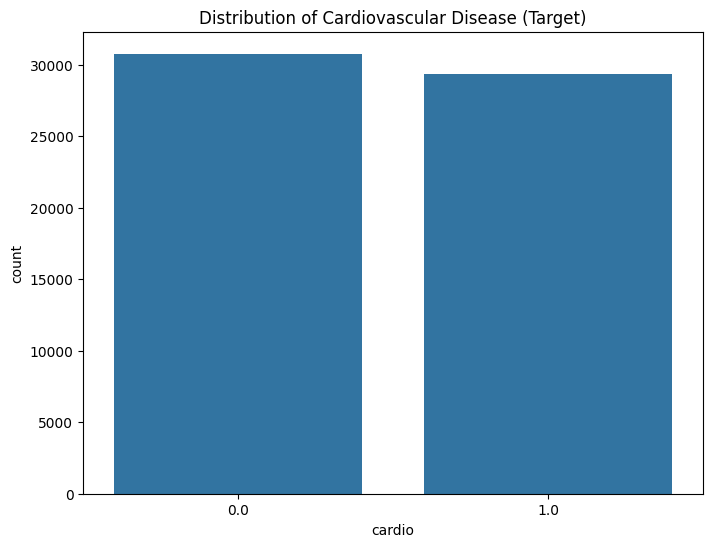

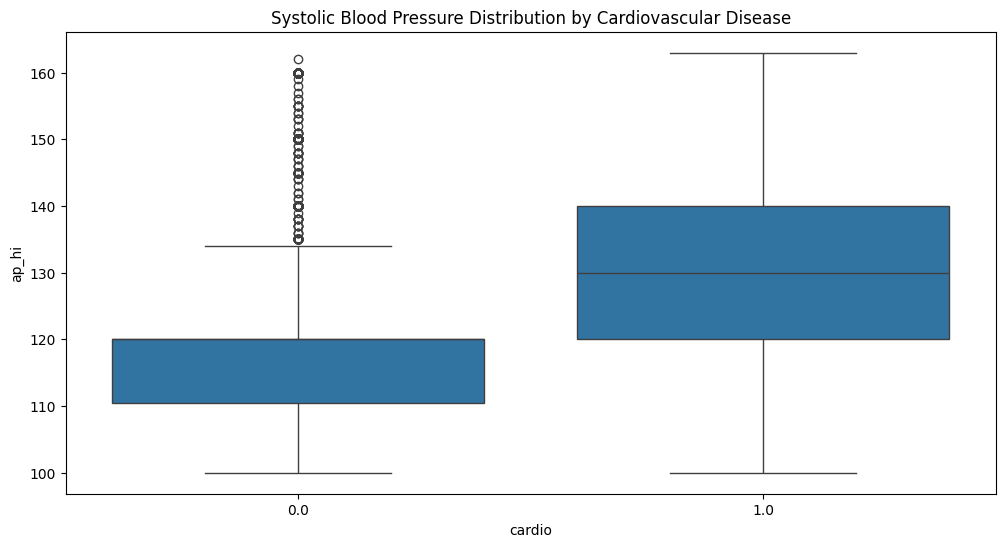

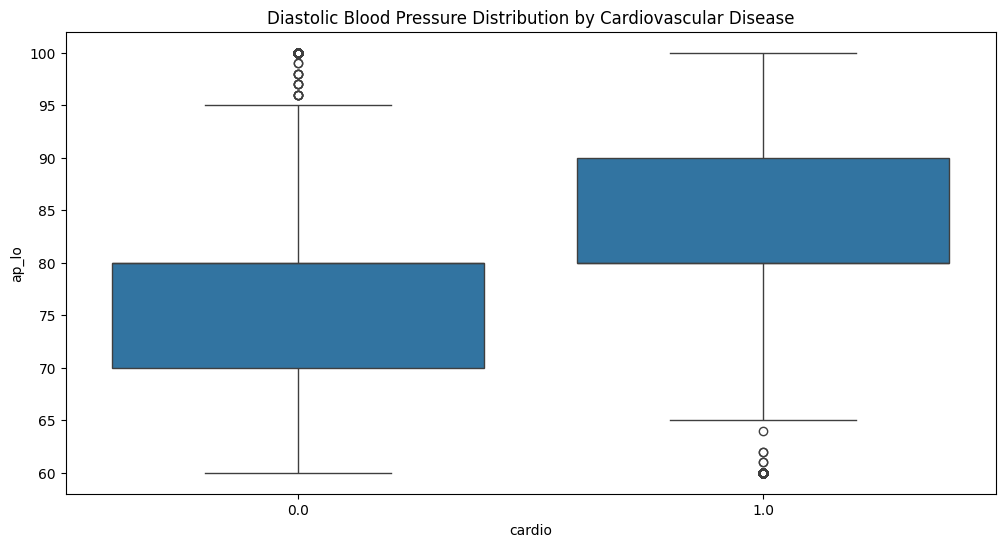

<Axes: xlabel='years', ylabel='count'>

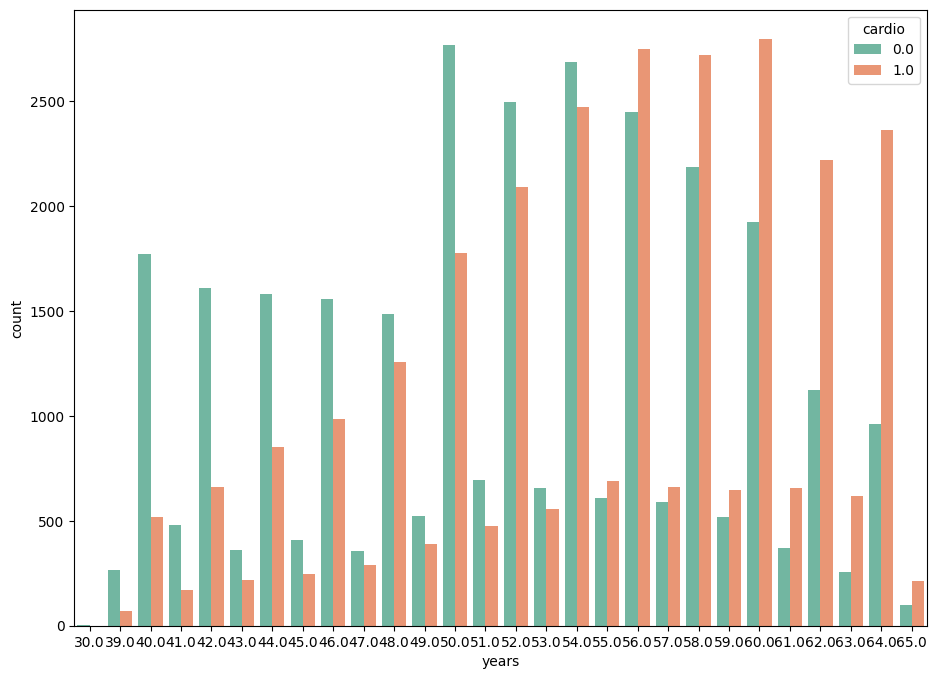

In [31]:
#1.Create histograms for numerical features
numerical_features = ['years', 'height', 'weight', 'ap_hi', 'ap_lo']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

#2.Create count plots for categorical features
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()
      
#3.Explore the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='cardio')
plt.title('Distribution of Cardiovascular Disease (Target)')
plt.show()

#4.The distribution of systolic blood pressure with respect to the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='cardio', y='ap_hi')
plt.title('Systolic Blood Pressure Distribution by Cardiovascular Disease')
plt.show()

#5.The distribution of diastolic blood pressure with respect to the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='cardio', y='ap_lo')
plt.title('Diastolic Blood Pressure Distribution by Cardiovascular Disease')
plt.show()

#6.Exposure to CVD based on age
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='years', hue='cardio', data = data, palette="Set2")

## Data modeling

In [40]:
#Features and Target
X = data[['years', 'height', 'weight', 'ap_hi', 'ap_lo', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']]
y = data['cardio']


#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#Initialize the Random Forest Classifier
#RFmodel = RandomForestClassifier(n_estimators = 100, criterion='entropy', max_depth=10, random_state = 42)
#RFmodel = RandomForestClassifier(n_estimators = 150, criterion='entropy',  max_depth=20, random_state = 42)
RFmodel = RandomForestClassifier(n_estimators=150, max_depth=6, max_features='sqrt', random_state=42)

#Fit the model
RFmodel.fit(X_train, y_train)

#Predict on the test set
y_pred = RFmodel.predict(X_test)

#Assessment of the model
##1.Accuracy
accuracy = round(accuracy_score(y_test, y_pred), 4)
print(f'The accuracy of the Random Forest Classifier is: {accuracy}')
print("\n")

##2.Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'The Confusion Matrix of the Random Forest Classifier is: {conf_matrix}')
print("\n")

##3.Classification Report
class_report = classification_report(y_test, y_pred)
print(f'The Classification Report of the Random Forest Classifier is:\n{class_report}')
print("\n")

##4.Precision
precision = round(precision_score(y_test, y_pred), 4)
print(f'The precision of the Random Forest Classifier is: {precision}')
print("\n")

##5.Recall
recall = round(recall_score(y_test, y_pred), 4)
print(f'The recall of the Random Forest Classifier is: {recall}')
print("\n")

##6.ROC-AUC score
y_pred_proba = RFmodel.predict_proba(X_test)[:, 1]
roc_auc= round(roc_auc_score(y_test, y_pred_proba), 4)
print(f'The ROC-AUC of the Random Forest Classifier is: {roc_auc}')
print("\n")

##7.Metrics altogether
metrics_rf = pd.DataFrame({
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'ROC-AUC'],
    'Scores' : [accuracy, precision, recall, roc_auc]
})
print(metrics_rf)

The accuracy of the Random Forest Classifier is: 0.7195


The Confusion Matrix of the Random Forest Classifier is: [[6209 1457]
 [2760 4610]]


The Classification Report of the Random Forest Classifier is:
              precision    recall  f1-score   support

         0.0       0.69      0.81      0.75      7666
         1.0       0.76      0.63      0.69      7370

    accuracy                           0.72     15036
   macro avg       0.73      0.72      0.72     15036
weighted avg       0.73      0.72      0.72     15036



The precision of the Random Forest Classifier is: 0.7598


The recall of the Random Forest Classifier is: 0.6255


The ROC-AUC of the Random Forest Classifier is: 0.7854


     Metrics  Scores
0   Accuracy  0.7195
1  Precision  0.7598
2     Recall  0.6255
3    ROC-AUC  0.7854


In [34]:
# X = data[['years', 'height', 'weight', 'ap_hi', 'ap_lo', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']]
test_array = [[21, 181, 90, 120, 80, 1, 1, 2, 0, 0, 1, 27.471688898]]
test_data = RFmodel.predict(test_array)
test_data

/home/aryaman-gupta/Desktop/batcave/open-source-proj/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])